### Optimal portfolio weights using Monte Carlo simulation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import scipy.stats as st
from scipy.linalg import expm, logm, sqrtm

#### Downloading stock prices

In [15]:
assets = ['JCI', 'TGT', 'CMCSA', 'CPB',
          'MO', 'APA', 'AAPL', 'MSFT', 'NVDA']
assets.sort()

start = '2019-12-30'
end = '2022-12-31'

prices = yf.download(assets, start=start, end=end)
prices.head()

C:\Users\josep\PycharmProjects\portfolio-convexopt\venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\josep\PycharmProjects\portfolio-convexopt\venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\josep\PycharmProjects\portfolio-convexopt\venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]C:\Users\josep\PycharmProjects\portfolio-convex

Price       Adj Close                                                         \
Ticker           AAPL        APA      CMCSA        CPB        JCI         MO   
Date                                                                           
2019-12-30  70.911522  23.763149  40.809364  43.151569  36.968712  35.978867   
2019-12-31  71.429672  23.847017  40.619686  43.300503  37.023273  35.993286   
2020-01-02  73.059425  23.632685  40.980984  42.485668  37.650791  35.517315   
2020-01-03  72.349144  23.940205  40.655807  42.433105  36.977802  35.791359   
2020-01-06  72.925644  23.893610  40.348709  42.503201  37.450710  35.935593   

Price                                              Close  ...        Open  \
Ticker            MSFT       NVDA         TGT       AAPL  ...         TGT   
Date                                                      ...               
2019-12-30  151.579422  57.851219  117.348236  72.879997  ...  129.000000   
2019-12-31  151.685196  58.593277  116.729141  73.412498  ...  128.399994   
2020-01-02  154.493774  59.741238  114.780769  75.087502  ...  128.740005   
2020-01-03  152.570129  58.785015  113.588081  74.357498  ...  124.660004   
2020-01-06  152.964493  59.031551  112.513733  74.949997  ...  123.970001   

Price          Volume                                                          \
Ticker           AAPL      APA     CMCSA      CPB      JCI       MO      MSFT   
Date                                                                            
2019-12-30  144114400  5445200  12896900  1285400  2029200  6691000  16348400   
2019-12-31  100805600  3347600  13881700  1469300  3609600  5978800  18369400   
2020-01-02  135480400  3395100  20170500  1730300  4201500  8717200  22622100   
2020-01-03  146322800  5940600  20496400  1658300  4206700  7850700  21116200   
2020-01-06  118387200  4471700  17628200  4328900  4998100  6532500  20813700   

Price                          
Ticker          NVDA      TGT  
Date                           
2019-12-30  25805600  2546500  
2019-12-31  23100400  4059800  
2020-01-02  23753600  5149800  
2020-01-03  20538400  5018500  
2020-01-06  26263600  4226900  

[5 rows x 54 columns]

In [16]:
print(prices.index)

DatetimeIndex(['2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=758, freq=None)


In [17]:
print(prices.columns)

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',   'APA'),
            ('Adj Close', 'CMCSA'),
            ('Adj Close',   'CPB'),
            ('Adj Close',   'JCI'),
            ('Adj Close',    'MO'),
            ('Adj Close',  'MSFT'),
            ('Adj Close',  'NVDA'),
            ('Adj Close',   'TGT'),
            (    'Close',  'AAPL'),
            (    'Close',   'APA'),
            (    'Close', 'CMCSA'),
            (    'Close',   'CPB'),
            (    'Close',   'JCI'),
            (    'Close',    'MO'),
            (    'Close',  'MSFT'),
            (    'Close',  'NVDA'),
            (    'Close',   'TGT'),
            (     'High',  'AAPL'),
            (     'High',   'APA'),
            (     'High', 'CMCSA'),
            (     'High',   'CPB'),
            (     'High',   'JCI'),
            (     'High',    'MO'),
            (     'High',  'MSFT'),
            (     'High',  'NVDA'),
            (     'High',   'TGT'),
            (      'Low',  '

In [24]:
prices = prices.loc[:, ('Adj Close', slice(None))]
print(prices.columns)
prices

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',   'APA'),
            ('Adj Close', 'CMCSA'),
            ('Adj Close',   'CPB'),
            ('Adj Close',   'JCI'),
            ('Adj Close',    'MO'),
            ('Adj Close',  'MSFT'),
            ('Adj Close',  'NVDA'),
            ('Adj Close',   'TGT')],
           names=['Price', 'Ticker'])


Price        Adj Close                                                         \
Ticker            AAPL        APA      CMCSA        CPB        JCI         MO   
Date                                                                            
2019-12-30   70.911522  23.763149  40.809364  43.151569  36.968712  35.978867   
2019-12-31   71.429672  23.847017  40.619686  43.300503  37.023273  35.993286   
2020-01-02   73.059425  23.632685  40.980984  42.485668  37.650791  35.517315   
2020-01-03   72.349144  23.940205  40.655807  42.433105  36.977802  35.791359   
2020-01-06   72.925644  23.893610  40.348709  42.503201  37.450710  35.935593   
...                ...        ...        ...        ...        ...        ...   
2022-12-23  130.959946  45.735176  33.911404  55.090576  62.497887  42.374432   
2022-12-27  129.142426  46.112679  33.776295  55.350254  62.692894  42.594360   
2022-12-28  125.179672  43.731541  33.409580  54.859749  61.639885  42.017025   
2022-12-29  128.725296  44.438141  33.824551  54.542362  62.848885  42.035358   
2022-12-30  129.043121  45.183449  33.747349  54.580833  62.400391  41.888733   

Price                                           
Ticker            MSFT        NVDA         TGT  
Date                                            
2019-12-30  151.579422   57.851219  117.348236  
2019-12-31  151.685196   58.593277  116.729141  
2020-01-02  154.493774   59.741238  114.780769  
2020-01-03  152.570129   58.785015  113.588081  
2020-01-06  152.964493   59.031551  112.513733  
...                ...         ...         ...  
2022-12-23  236.195007  151.985428  137.644409  
2022-12-27  234.443817  141.140762  139.952087  
2022-12-28  232.039612  140.291168  140.192490  
2022-12-29  238.450821  145.958389  142.663635  
2022-12-30  237.273453  146.068329  143.307861  

[758 rows x 9 columns]

In [25]:
prices.columns = assets
prices.head()

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,NVDA,TGT
Date,,,,,,,,,
2019-12-30,70.911522,23.763149,40.809364,43.151569,36.968712,35.978867,151.579422,57.851219,117.348236
2019-12-31,71.429672,23.847017,40.619686,43.300503,37.023273,35.993286,151.685196,58.593277,116.729141
2020-01-02,73.059425,23.632685,40.980984,42.485668,37.650791,35.517315,154.493774,59.741238,114.780769
2020-01-03,72.349144,23.940205,40.655807,42.433105,36.977802,35.791359,152.570129,58.785015,113.588081
2020-01-06,72.925644,23.893610,40.348709,42.503201,37.450710,35.935593,152.964493,59.031551,112.513733


### Compute log returns

In [26]:
prices.shift(-1).head()

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,NVDA,TGT
Date,,,,,,,,,
2019-12-30,71.429672,23.847017,40.619686,43.300503,37.023273,35.993286,151.685196,58.593277,116.729141
2019-12-31,73.059425,23.632685,40.980984,42.485668,37.650791,35.517315,154.493774,59.741238,114.780769
2020-01-02,72.349144,23.940205,40.655807,42.433105,36.977802,35.791359,152.570129,58.785015,113.588081
2020-01-03,72.925644,23.893610,40.348709,42.503201,37.450710,35.935593,152.964493,59.031551,112.513733
2020-01-06,72.582657,30.295681,40.775234,42.529671,37.059662,35.748089,151.569794,59.746223,112.714043


In [28]:
R = np.log(prices.shift(-1) / prices)
R = R.dropna()
R.head()

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,NVDA,TGT
Date,,,,,,,,,
2019-12-30,0.007280,0.003523,-0.004659,0.003445,0.001475,0.000401,0.000698,0.012745,-0.005290
2019-12-31,0.022560,-0.009028,0.008855,-0.018997,0.016807,-0.013312,0.018347,0.019403,-0.016832
2020-01-02,-0.009770,0.012929,-0.007966,-0.001238,-0.018036,0.007686,-0.012529,-0.016136,-0.010445
2020-01-03,0.007937,-0.001948,-0.007582,0.001651,0.012708,0.004022,0.002581,0.004185,-0.009503
2020-01-06,-0.004714,0.237394,0.010515,0.000623,-0.010497,-0.005231,-0.009160,0.012034,0.001779


In [36]:
mean_return = R.mean(axis = 0).to_numpy()
std_return = R.std(axis = 0).to_numpy()
cov = np.cov(R, rowvar=False, ddof=1)

### Monte Carlo simulation

1. Generate random portfolio weights
2. Compute portfolio returns
3. Compute portfolio volatility
4. Plot the efficient frontier

If $\textbf{x}$ is a portfolio of weights, the mean of the portfolio is $\textbf{x}^T \mu$ and the variance is $\textbf{x}^T \Sigma \textbf{x}$

**Vectorized computation of portfolio variance:**

$$\textbf{x}^T \Sigma \textbf{x} = \textbf{x}^T \textbf{\Sigma}^{\frac{1}{2}} \textbf{\Sigma}^{\frac{1}{2}}\textbf{x} = (\textbf{\Sigma}^{\frac{1}{2}} \textbf{x} )^T\textbf{\Sigma}^{\frac{1}{2}}\textbf{x} = \lVert \textbf{\Sigma}^{\frac{1}{2}}\mathbf{x} \rVert_2^2 $$

**Portfolio standard deviation:**
$$\lVert \textbf{\Sigma}^{\frac{1}{2}}\mathbf{x} \rVert_2$$
where $\Sigma$ is the covariance matrix of the returns.

**Efficient frontier for the below portfolios is constructed below:**
1. Random portfolio
2. Quasi-Monte Carlo portfolio
3. Dirichlet portfolio

Dirchlet distribution is used to incorporate prior information about the portfolio weights. For example, if we believe that the first and last assets have higher expected returns, we can use Dirichlet distribution to incorporate this information. 

Random portfolio sharpe ratio: 0.038059801408509376
Quasi-Monte Carlo portfolio sharpe ratio: 0.03744392932297374
Dirichlet portfolio sharpe ratio: 0.035117293991287914


C:\Users\josep\PycharmProjects\portfolio-convexopt\venv\lib\site-packages\scipy\stats\_qmc.py:804: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


Text(0, 0.5, 'Portfolio mean return')

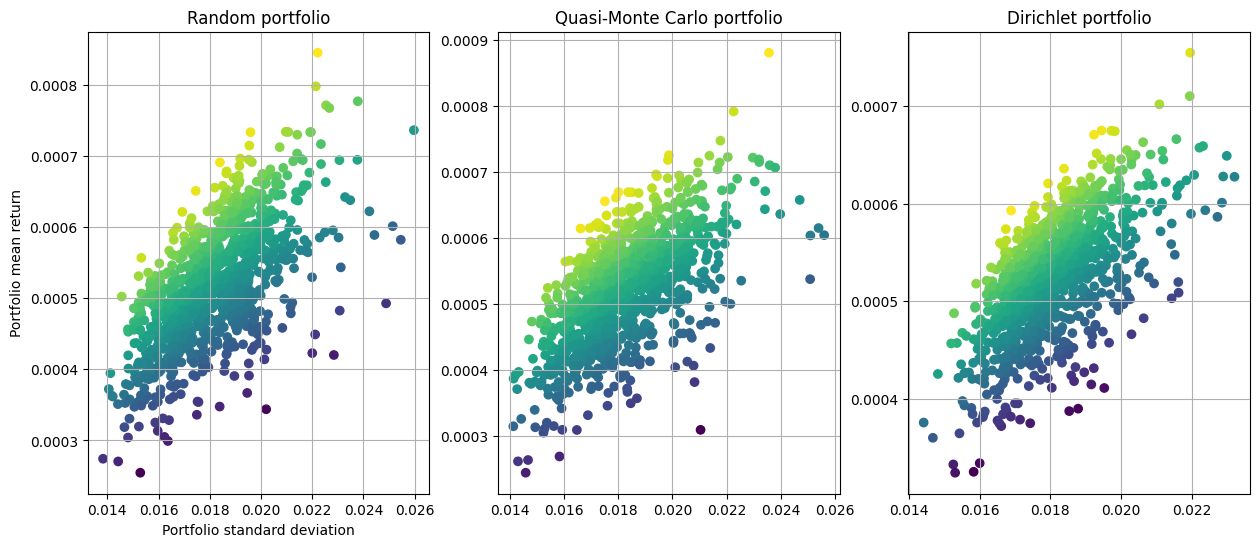

In [92]:
def compute_portfolio_mean_sd(weights, mean_return, cov):
    portfolio_returns = weights @ mean_return
    portfolio_sd = np.linalg.norm(sqrtm(cov) @ weights.T, axis=0, ord=2)
    return portfolio_returns, portfolio_sd

num_portfolios = 1000
num_assets = len(assets)

rs = np.random.RandomState(42)

# Construct random portfolio weights
random_portfolio_weights = rs.rand(num_portfolios, num_assets)
normalizer = random_portfolio_weights.sum(axis=1).reshape(-1, 1)
random_portfolio_weights = random_portfolio_weights / normalizer

random_portfolio_mu, random_portfolio_std =  compute_portfolio_mean_sd(random_portfolio_weights, mean_return, cov)
random_portfolio_sharpe = random_portfolio_mu / random_portfolio_std

# Construct Sobel portfolio weights
mc_portfolio_weights = st.qmc.Sobol(num_assets, scramble=True).random(num_portfolios)
normalizer = mc_portfolio_weights.sum(axis=1).reshape(-1, 1)
mc_portfolio_weights = mc_portfolio_weights / normalizer

mc_portfolio_mu, mc_portfolio_std =  compute_portfolio_mean_sd(mc_portfolio_weights, mean_return, cov)
mc_portfolio_sharpe = mc_portfolio_mu / mc_portfolio_std

# Construct Dirchlet portfolio weights

# Equally weighted portfolio
mc_portfolio_weights_dirichlet = rs.dirichlet(np.ones(num_assets), num_portfolios) 
# Equally weighted portfolio but lower variance than previous one. Higher the weight, lower the variance
mc_portfolio_weights_dirichlet = rs.dirichlet(np.ones(num_assets), num_portfolios) 

# First and last assets have higher weights with mu = 5.0/9.0. Higher the weight, higher the mean return, lower the variance
mc_portfolio_weights_dirichlet = rs.dirichlet([5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0], num_portfolios)

mc_portfolio_mu_dirichlet, mc_portfolio_std_dirichlet =  compute_portfolio_mean_sd(mc_portfolio_weights_dirichlet, mean_return, cov)

mc_portfolio_sharpe_dirichlet = mc_portfolio_mu_dirichlet / mc_portfolio_std_dirichlet

print(f"Random portfolio sharpe ratio: {random_portfolio_sharpe.max()}")
print(f"Quasi-Monte Carlo portfolio sharpe ratio: {mc_portfolio_sharpe.max()}")
print(f"Dirichlet portfolio sharpe ratio: {mc_portfolio_sharpe_dirichlet.max()}")

# Plot the efficient frontier
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].scatter(random_portfolio_std, random_portfolio_mu, c=random_portfolio_sharpe, cmap='viridis', marker='o')
ax[0].set_title('Random portfolio')
ax[0].grid(True)

ax[1].scatter(mc_portfolio_std, mc_portfolio_mu, c=mc_portfolio_sharpe, cmap='viridis', marker='o')
ax[1].set_title('Quasi-Monte Carlo portfolio')
ax[1].grid(True)

ax[2].scatter(mc_portfolio_std_dirichlet, mc_portfolio_mu_dirichlet, c=mc_portfolio_sharpe_dirichlet, cmap='viridis', marker='o')
ax[2].set_title('Dirichlet portfolio')
ax[2].grid(True)

ax[0].set_xlabel('Portfolio standard deviation')
ax[0].set_ylabel('Portfolio mean return')    